# "Introducing NetworkX and Pandas with NumPy"

> Say goodbye broken links on your static sites.  Platform independent, fast, and built in python.
- author: Siva <byteshiva@gmail.com>
- toc: false
- image: images/copied_from_nb/fastlinkcheck_images/fastlinkcheck.png
- comments: true
- categories: [Networkx, Pandas, NumPy, Matplotlib, Jupyter, Python, Jupyter Notebook]
- permalink: /fastlinkcheck/
- badges: true

In [ ]:
!wget https://raw.githubusercontent.com/byteshiva/blog/master/_notebooks/my_csvs/sample_trans.csv 

In [ ]:
!pip install networkx
!pip install pandas
!pip install tqdm
!pip install numpy
!pip install matplotlib

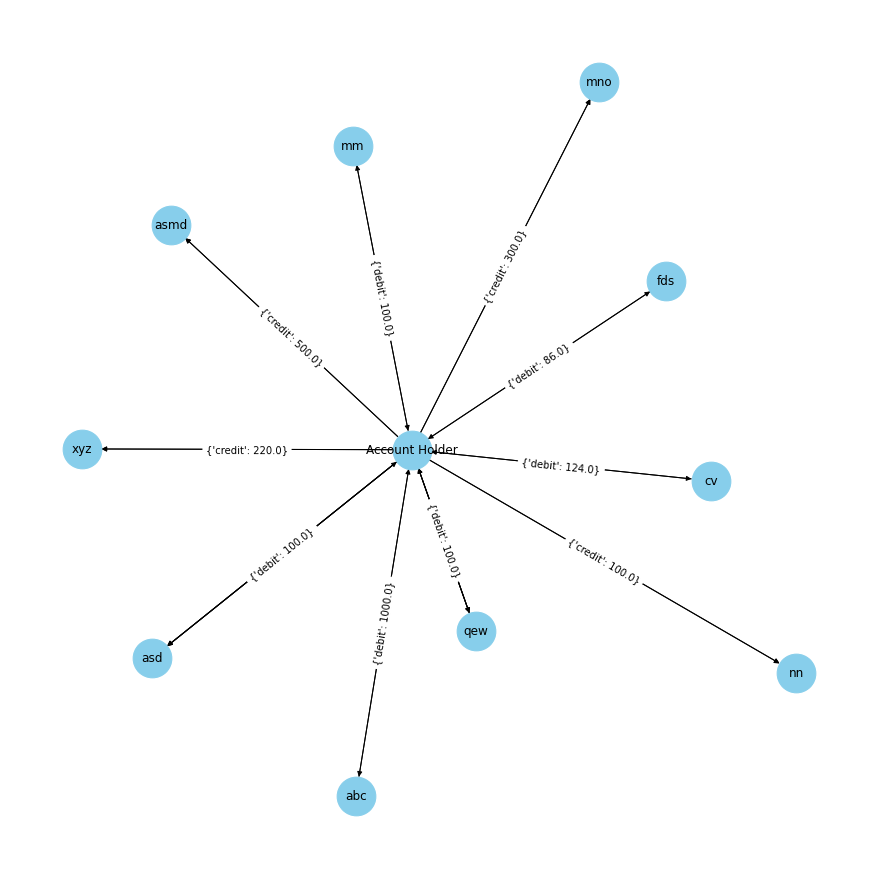

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np


df = pd.read_csv("./sample_trans.csv")

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

df.head(100)
target = df['Description']
source = "Account Holder"

relations = df['DR']
# print(relations)

kg_df = pd.DataFrame({'source':source, 'target':target, 'Debit':relations})
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

# G = nx.Graph()
CR = df['CR']
DR = df['DR']
for target, cr, dr in zip(df['Description'], CR, DR):
    if pd.isna(cr):
      G.add_edge(target, source, debit=dr)
    else:
      G.add_edge(source, target, credit=cr)


plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
pos1 = nx.spring_layout(G, k = 0.9)
pos2 = nx.spring_layout(G, k = 1.2)


nx.draw(G, with_labels=True, node_color='skyblue',node_size=1500, edge_cmap=plt.cm.Blues, pos = pos2)
nx.draw_networkx_edge_labels(G, pos=pos2)
plt.show()



